# Sparse Hebbian Learning 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run setup.py --description

 This is a collection of python scripts to test learning strategies to efficiently code natural image patches.  This is here restricted  to the framework of the [SparseNet algorithm from Bruno Olshausen](http://redwood.berkeley.edu/bruno/sparsenet/).


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

Extracting data..loading the data called : probe/cache_dir/data_data
Data is of shape : (65520, 196) - done in 0.09s.
No cache found probe/cache_dir/HULK_homeo_dico.pkl: Learning the dictionary with algo = mp 
 Training on 65520 patches
Iteration   1 /   1025 (elapsed time:   0s,   0mn   0s)
Iteration  129 /   1025 (elapsed time:  25s,   0mn  25s)
Iteration  257 /   1025 (elapsed time:  49s,   0mn  49s)
Iteration  385 /   1025 (elapsed time:  74s,   1mn  14s)
Iteration  513 /   1025 (elapsed time:  101s,   1mn  41s)
Iteration  641 /   1025 (elapsed time:  126s,   2mn   6s)
Iteration  769 /   1025 (elapsed time:  137s,   2mn  17s)
Iteration  897 /   1025 (elapsed time:  147s,   2mn  27s)
Iteration  1025 /   1025 (elapsed time:  157s,   2mn  37s)
done (total time:  157s,  2.6mn)
done in 159.53s.
No cache found probe/cache_dir/HULK_homeo_coding.npy: Coding with algo = mp 
 Coding data with algorithm  mp loading the code called : probe/cache_dir/HULK_homeo_coding.npy


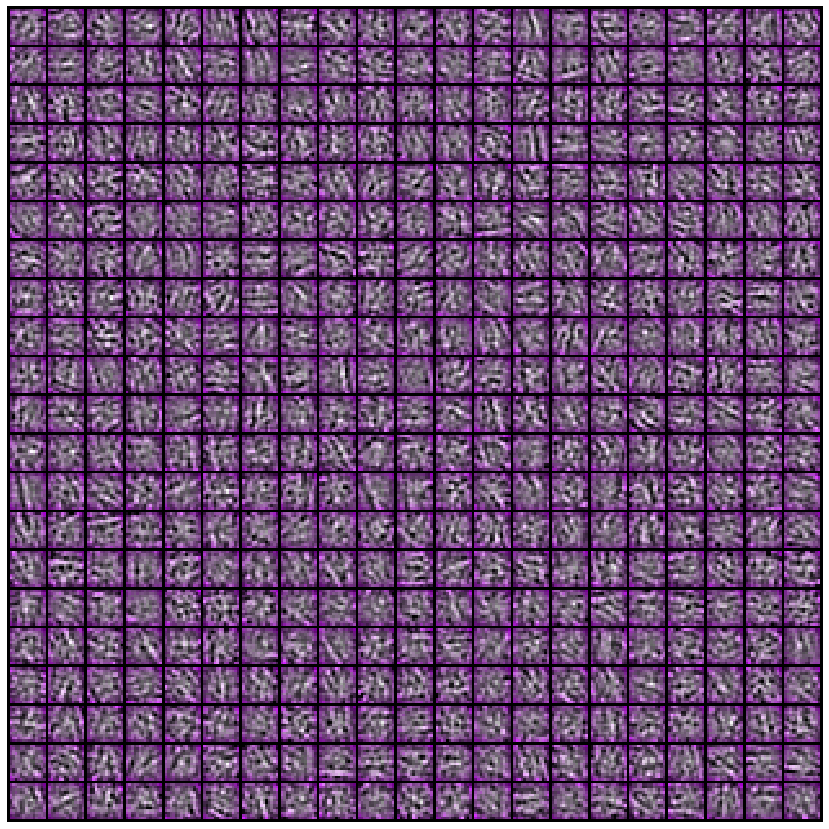

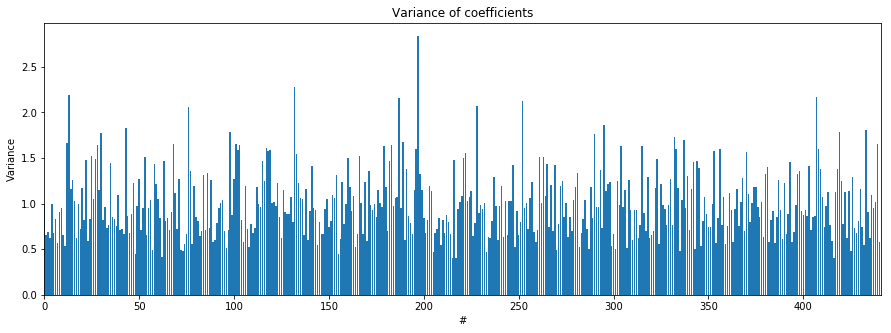

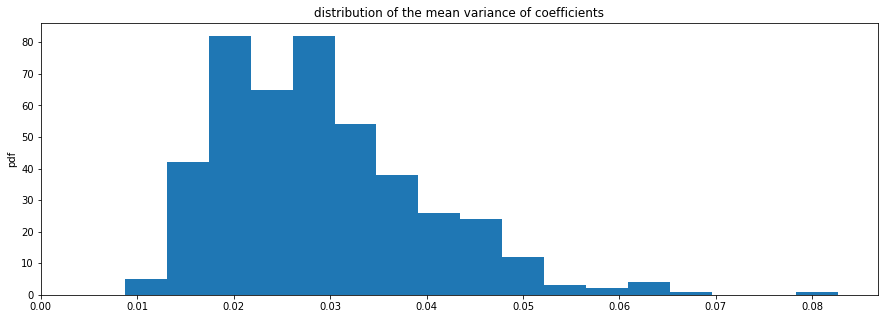

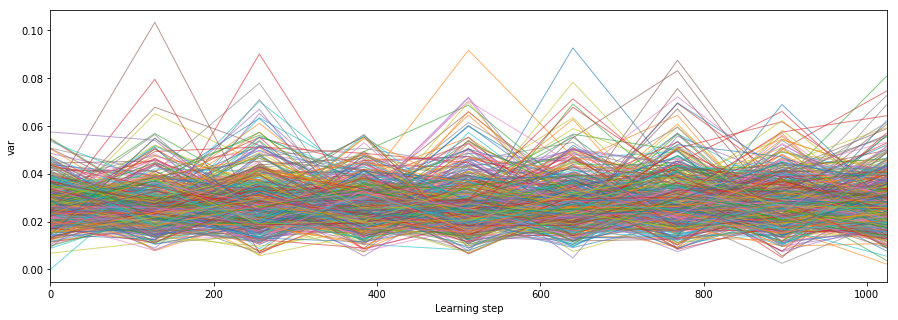

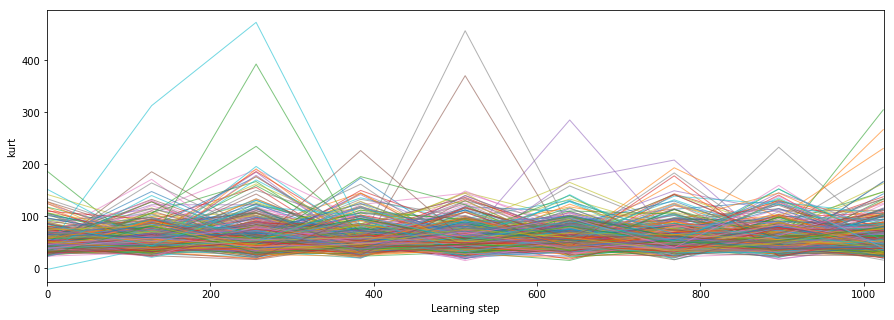

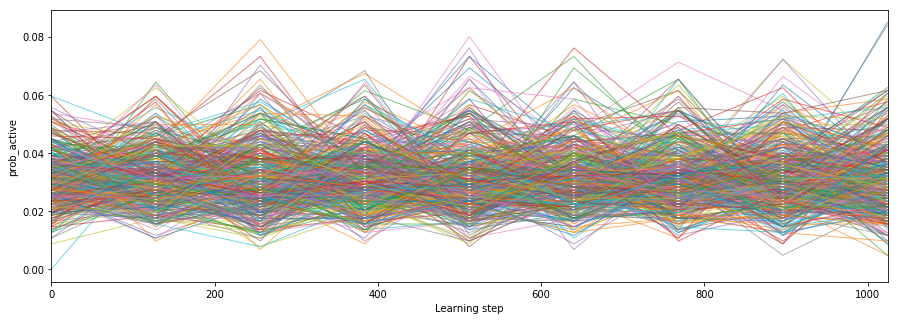

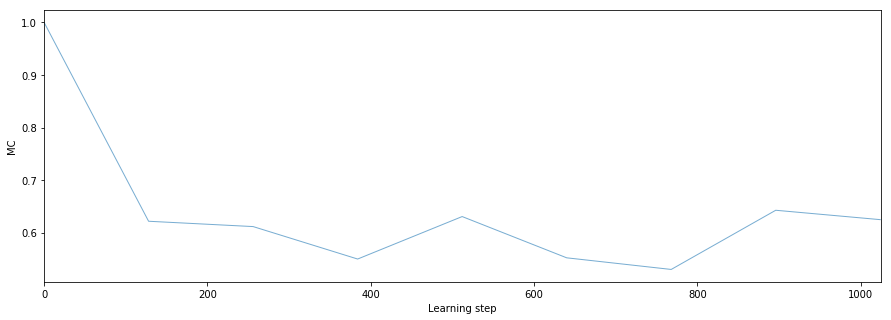

In [4]:
from shl_scripts.shl_experiments import SHL

DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 10, 10
DEBUG_DOWNSCALE, verbose = 1, 10

list_figures = ['show_dico', 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var', 'time_plot_MC']
opts= dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, verbose=verbose, cache_dir='probe/cache_dir', datapath='database')
shl = SHL(**opts)
tag = 'HULK'
data = shl.get_data(matname='data')
dico = shl.learn_dico(data=data, matname=tag + '_homeo', list_figures=list_figures)   

### control: learning without homeostasis

During the learning, to avoid divergence, the norm of the filters is shunted to $1$.

No cache found probe/cache_dir/HULK_nohomeo_dico.pkl: Learning the dictionary with algo = mp 
 Training on 65520 patches
Iteration   1 /   1025 (elapsed time:   0s,   0mn   0s)
Iteration  129 /   1025 (elapsed time:   6s,   0mn   6s)
Iteration  257 /   1025 (elapsed time:  12s,   0mn  12s)
Iteration  385 /   1025 (elapsed time:  18s,   0mn  18s)
Iteration  513 /   1025 (elapsed time:  25s,   0mn  25s)
Iteration  641 /   1025 (elapsed time:  31s,   0mn  31s)
Iteration  769 /   1025 (elapsed time:  37s,   0mn  37s)
Iteration  897 /   1025 (elapsed time:  43s,   0mn  43s)
Iteration  1025 /   1025 (elapsed time:  49s,   0mn  49s)
done (total time:  49s,  0.8mn)
done in 50.40s.
No cache found probe/cache_dir/HULK_nohomeo_coding.npy: Coding with algo = mp 
 Coding data with algorithm  mp loading the code called : probe/cache_dir/HULK_nohomeo_coding.npy


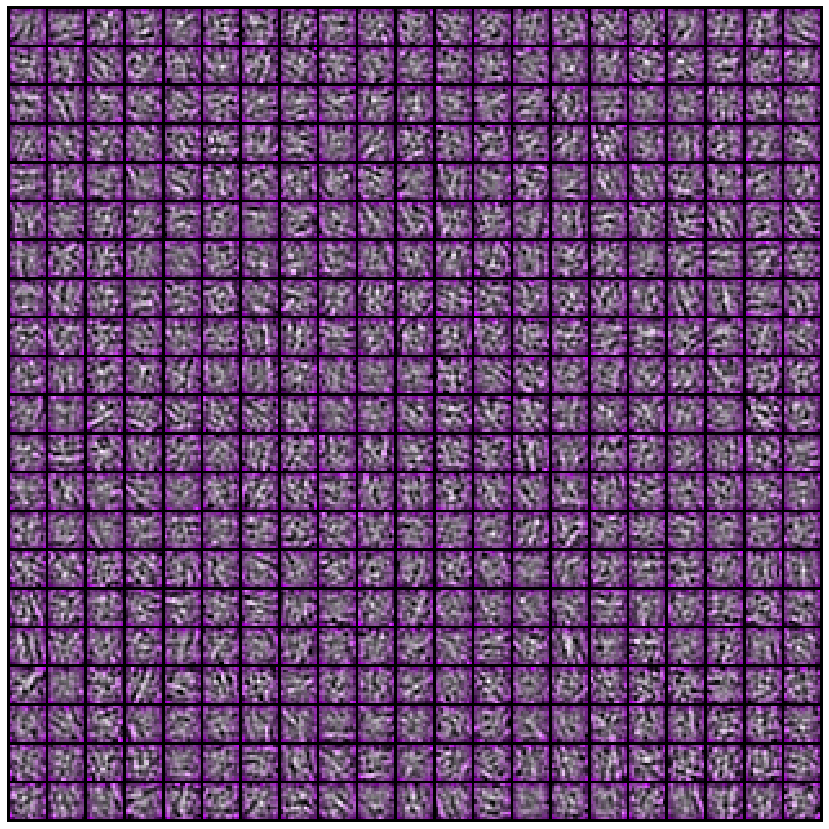

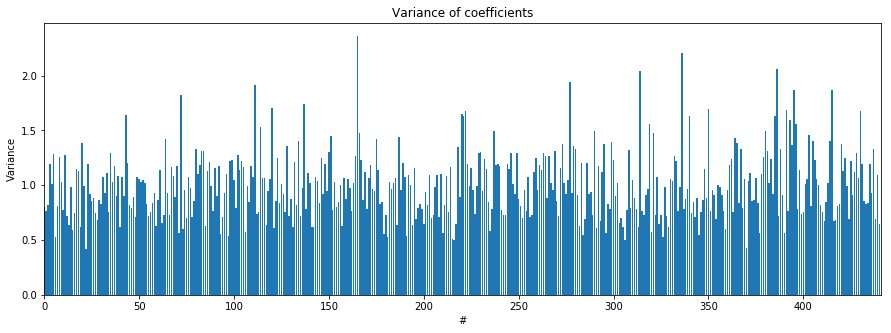

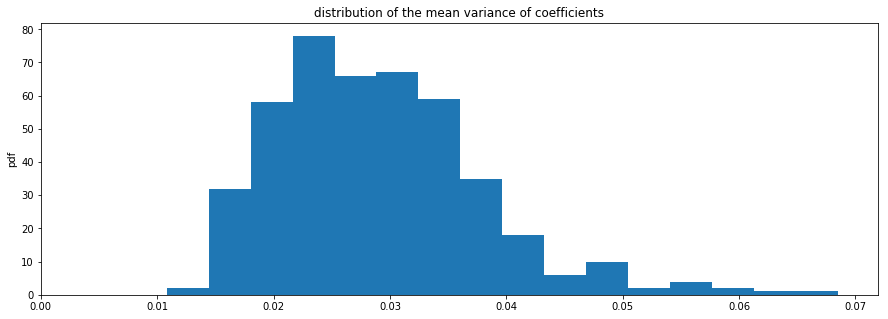

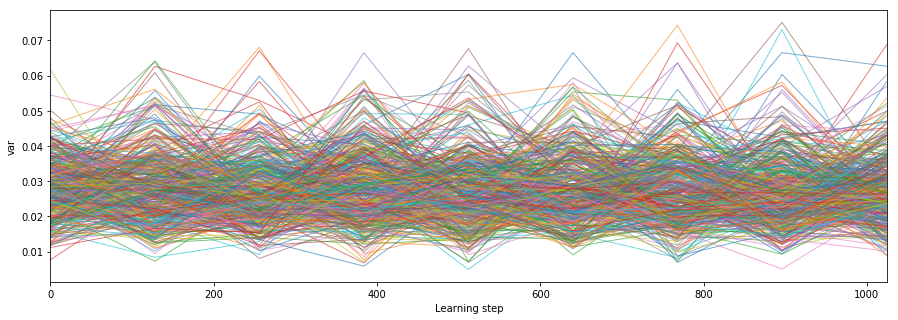

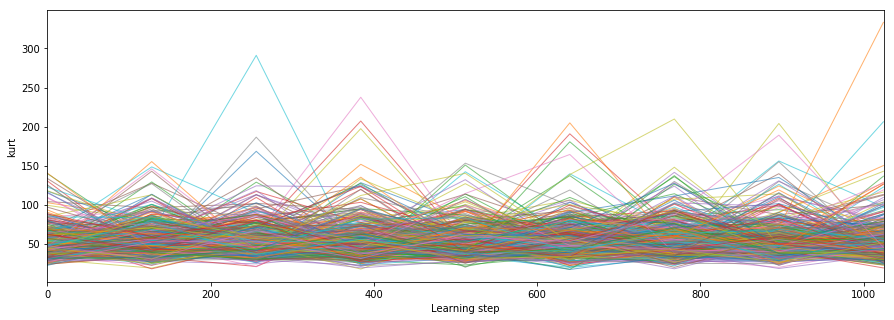

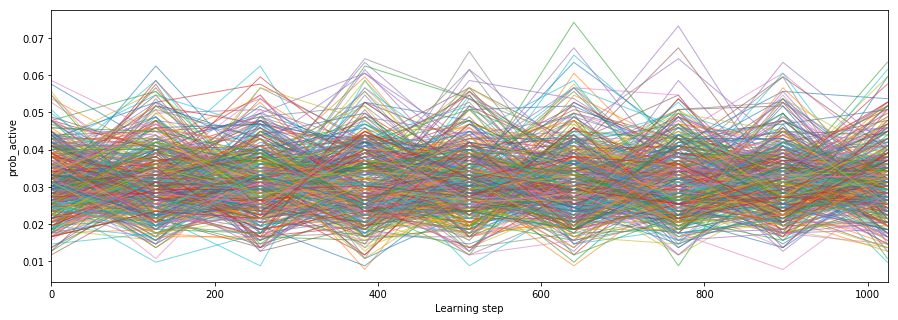

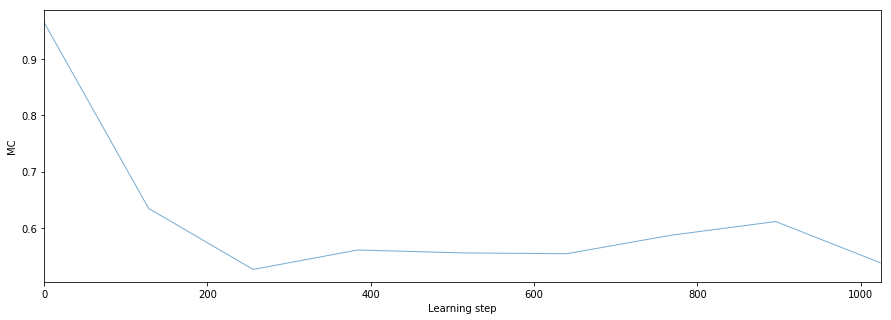

In [5]:
shl = SHL(homeo_method='None', **opts)
matname = tag + '_nohomeo'
dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures) 

# Sparse Hebbian Learning : reproducing SparseNet

If we test the convergence of SparseNet as a function of different learning parameters, it shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters:

See :
* http://blog.invibe.net/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the ``scikit-learn`` package
* http://blog.invibe.net/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

## Version used

In [6]:
!rm -fr {shl.cache_dir}/{tag}*

In [7]:
!ls {shl.cache_dir}/HULK_*

ls: probe/cache_dir/HULK_*: No such file or directory


In [8]:
%load_ext version_information
%version_information numpy, shl_scripts

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython 6.5.0
OS Darwin 17.7.0 x86_64 i386 64bit
numpy 1.15.1
shl_scripts 20171221
Tue Sep 25 12:06:46 2018 CEST